In [2]:
#Installed required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read dataset
df = pd.read_csv(r"similarity_times.csv", header = None)
df


,0,1,2
0,2,10,415.633178
1,2,10,423.102465
2,2,10,411.445892
3,5,10,79.413802
4,5,10,83.227558
5,5,10,84.455618


In [4]:
# Fix formatting
df.columns = ['Processes','Viewpoints','Time']
df = df.sort_values(by='Processes')
df['Processes'] = df['Processes'] - 1
df['Processes'] = df['Processes'].astype(str)
df

,Processes,Viewpoints,Time
0,1,10,415.633178
1,1,10,423.102465
2,1,10,411.445892
3,4,10,79.413802
4,4,10,83.227558
5,4,10,84.455618


<Figure size 800x600 with 0 Axes>

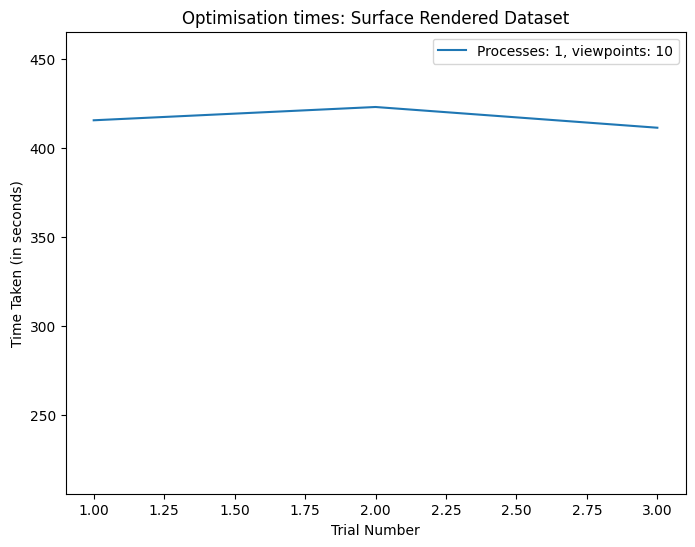

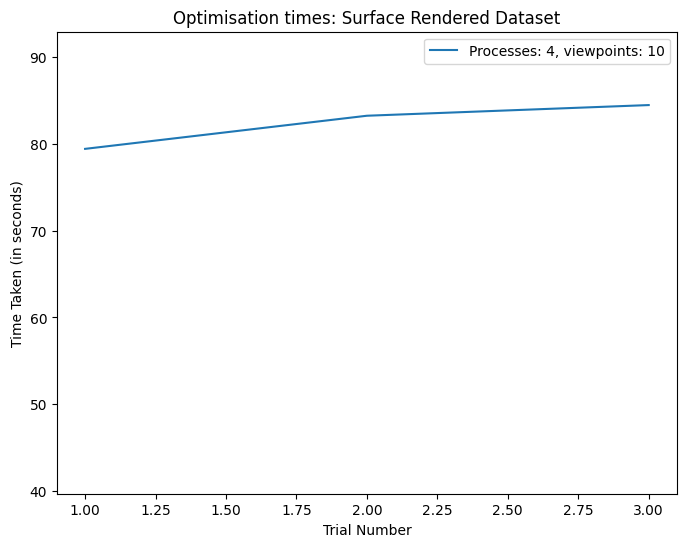

In [5]:
#Group by viewpoint count
splitdfs = df.groupby('Processes')

# Create plots for each viewpoint count
plt.figure(figsize=(8, 6))
for pc, minidf in splitdfs:
    split2dfs = minidf.groupby('Viewpoints')
    for viewc, tinydf in split2dfs:
        x = list(range(1, tinydf.shape[0]+1))
        plt.figure(figsize=(8, 6))
        plt.plot(x, minidf['Time'], label=f'Processes: {pc}, viewpoints: {viewc}')
        #plt.xticks(x, x.astype(int))
        plt.ylim(min(minidf['Time']*0.5), max(minidf['Time']*1.1))
        plt.xlabel('Trial Number')
        plt.ylabel('Time Taken (in seconds)')

        plt.title("Optimisation times: Surface Rendered Dataset")
        plt.legend()
        plt.savefig('similarity' + str(viewc) + '_' + str(pc) +'.png')
        plt.show()